In [1]:
import pandas as pd

In [2]:
l = [5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215]

In [3]:
s = pd.Series(l)

In [5]:
bins = pd.cut(s, 3) # Equal frequency binning

# How do we make data smooth using mean?

In [6]:
df = pd.DataFrame(
    {
        'data': l,
        'bins': bins
    }
)

In [7]:
df

,data,bins
0,5,"(4.79, 75.0]"
1,10,"(4.79, 75.0]"
2,11,"(4.79, 75.0]"
3,13,"(4.79, 75.0]"
4,15,"(4.79, 75.0]"
5,35,"(4.79, 75.0]"
6,50,"(4.79, 75.0]"
7,55,"(4.79, 75.0]"
8,72,"(4.79, 75.0]"
9,92,"(75.0, 145.0]"


In [11]:
t = df.groupby(['bins']).mean(['data'])

In [12]:
t

,data
bins,
"(4.999, 14.333]",9.75
"(14.333, 60.667]",38.75
"(60.667, 215.0]",145.75


In [13]:
map_of_mean_values = {}
for i in t.iterrows():
    
    # type(i[0]): Interval
    # type(i[1]): Series
    
    map_of_mean_values.update({str(i[0]): i[1][0]})

In [14]:
map_of_mean_values

{'(4.999, 14.333]': 9.75, '(14.333, 60.667]': 38.75, '(60.667, 215.0]': 145.75}

In [15]:
df['bins'] = df['bins'].astype(str)

In [16]:
df[df['bins'] == '(4.999, 12.5]']

,data,bins


In [17]:
df['smoothed_values'] = df['bins'].apply(lambda x: map_of_mean_values[x])

In [18]:
df

,data,bins,smoothed_values
0,5,"(4.999, 14.333]",9.75
1,10,"(4.999, 14.333]",9.75
2,11,"(4.999, 14.333]",9.75
3,13,"(4.999, 14.333]",9.75
4,15,"(14.333, 60.667]",38.75
5,35,"(14.333, 60.667]",38.75
6,50,"(14.333, 60.667]",38.75
7,55,"(14.333, 60.667]",38.75
8,72,"(60.667, 215.0]",145.75
9,92,"(60.667, 215.0]",145.75


In [19]:
import matplotlib.pyplot as plt

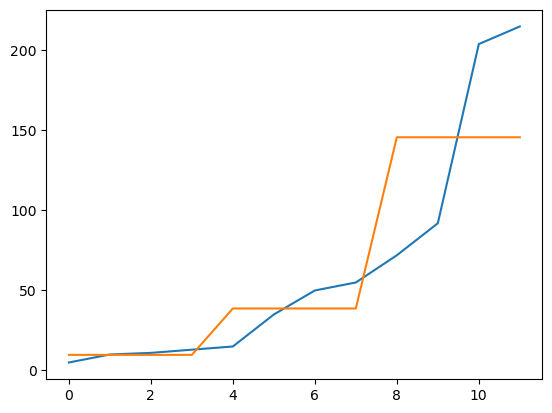

In [20]:
plt.plot(df['data'])
plt.plot(df['smoothed_values'])